In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Questão 1

In [137]:
artificial = pd.read_csv('artificial1d.csv')

artificial.head()

,x,y
0,-1.000000,-2.082017
1,-0.931034,-1.326980
2,-0.862069,-1.105598
3,-0.793103,-0.873946
4,-0.724138,-0.285027


## Item a

## Item b

In [301]:
x = artificial.x
y = artificial.y
n = x.shape[0]

x = np.column_stack([np.ones(n), x])

pesos = np.zeros(2)
passo_aprendizado = 0.1
epochs = 200

historico_mse = []
historico_epochs = []

t = 0
while t <= epochs:
    historico_epochs.append(t)
    y_pred = np.dot(x,pesos)
    erro = y - y_pred
    
    mse = (np.sum(erro**2)) / (2*n)
    historico_mse.append(mse)


    gradientes = - (1/n) * np.dot(x.T,erro)
    pesos -= passo_aprendizado * gradientes
    
    t+=1
print(pesos)

[0.06761792 1.57379358]


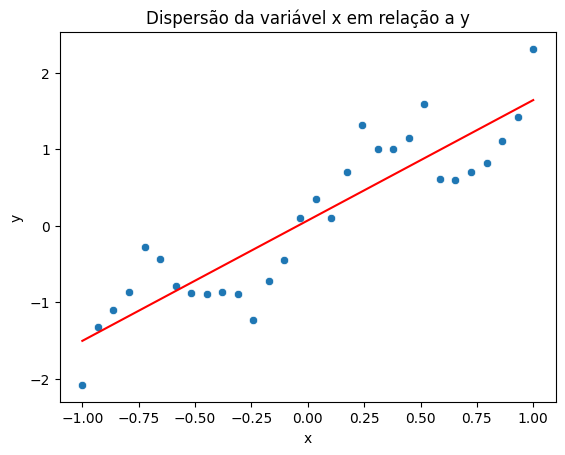

In [302]:
sns.scatterplot(x=x[:, 1], y=y)

plt.plot(x[:, 1], y_pred, color='red')
plt.title('Dispersão da variável x em relação a y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

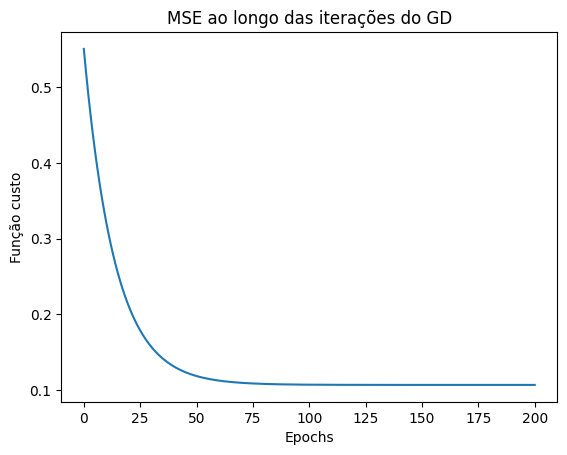

In [303]:
sns.lineplot(x=historico_epochs, y=historico_mse)
plt.title('MSE ao longo das iterações do GD')
plt.xlabel('Epochs')
plt.ylabel('Função custo')
plt.show()

## Item c

In [ ]:
x = artificial.x
y = artificial.y
n = x.shape[0]

x = np.column_stack([np.ones(n), x])

pesos = np.zeros(2)
passo_aprendizado = 0.01
epochs = 100

historico_mse = []
historico_epochs = []
t = 0
for _ in range(epochs):

    indices = np.random.permutation(n)
    x_permutado, y_permutado = x[indices], y[indices]
    

    for i in range(n):
        t+=1
        xi, yi = x_permutado[i], y_permutado[i]

        y_pred = np.dot(xi,pesos)
        
        erro = yi - y_pred

        gradientes =  xi * erro
        #print('pesos: ',pesos)
        #print('pa * g: ',passo_aprendizado*gradientes)
        pesos += passo_aprendizado * gradientes
        #print('atuais: ',pesos)

    y_pred = np.dot(x, pesos)
    mse = (np.sum((y-y_pred)**2)) / (2*n)
    historico_mse.append(mse)
    
    historico_epochs.append(t)

    
print(pesos)

[0.14829908 0.00694937]


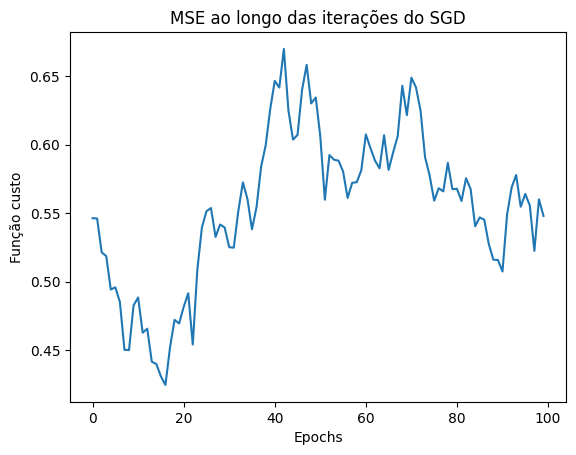

In [341]:
sns.lineplot(historico_mse)
plt.title('MSE ao longo das iterações do SGD')
plt.xlabel('Epochs')
plt.ylabel('Função custo')
plt.show()

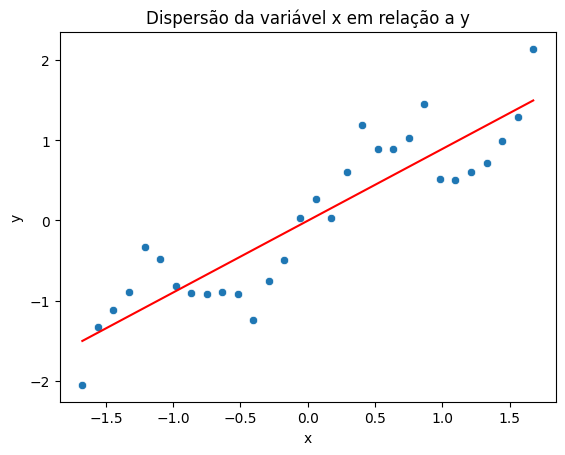

In [223]:
sns.scatterplot(x=x[:, 1], y=y)

plt.plot(x[:, 1], y_pred, color='red')
plt.title('Dispersão da variável x em relação a y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()